# Interacting with CLIP

This is a self-contained notebook that shows how to download and run CLIP models, calculate the similarity between arbitrary image and text inputs, and perform zero-shot image classifications.

In [5]:
import os

def get_free_path(path):
  i = 0
  
  while os.path.exists(path):
      i += 1
      path = path + ("_%02d" % i)
  return path


# Parameters

In [6]:
ipfs_path = "/content/ipfs"

experiment_name = "posthuman_final"

experiment_path_suffix = f"video_to_clip/{experiment_name}" #get_free_path(f"{ipfs_path}/video_to_clip/{experiment_name}")
experiment_path = f"{ipfs_path}/{experiment_path_suffix}"

results_path = f"{experiment_path}/results"


print("Experiment Path:",experiment_path)
!mkdir -p $experiment_path/results

Experiment Path: /content/ipfs/video_to_clip/posthuman_final


print("_%02d" % 2)
!pip install youtube-dl
!youtube-dl https://www.youtube.com/watch?v=4hQh3G1dVpk --output $experiment_path/heaven
!mkdir -p $experiment_path/frames
!ffmpeg -i $experiment_path/heaven.mkv -y -vf "crop=in_h*1/1:in_h,scale=-2:512,fps=15" $experiment_path/frames/frame_%04d.png
#ffmpeg -i SomeInput.mp4 -t 4 SomeOutput.mp4

In [7]:
!wget http://ipfs.pollinations.ai:8080/ipfs/QmdvoCnPjubRWDHZp2EbWUzmdBjZwFKhDCZrYPVL9Kfwwo -O $experiment_path/posthuman_all.mp4
!mkdir -p $experiment_path/frames
!ipfs get QmdvoCnPjubRWDHZp2EbWUzmdBjZwFKhDCZrYPVL9Kfwwo
!ffmpeg -i $experiment_path/posthuman_all.mp4 -y -vf "crop=in_h*1/1:in_h,scale=-2:512,fps=10" $experiment_path/frames/frame_%04d.png



--2021-05-23 11:26:27--  http://ipfs.pollinations.ai:8080/ipfs/QmdvoCnPjubRWDHZp2EbWUzmdBjZwFKhDCZrYPVL9Kfwwo
Resolving ipfs.pollinations.ai (ipfs.pollinations.ai)... 18.157.205.205
Connecting to ipfs.pollinations.ai (ipfs.pollinations.ai)|18.157.205.205|:8080... connected.
HTTP request sent, awaiting response... 200 OK
Length: 181156371 (173M) [video/mp4]
Saving to: ‘/content/ipfs/video_to_clip/posthuman_final/posthuman_all.mp4’

/content/ipfs/video 100%[===================>] 172.76M  21.5MB/s    in 9.0s    

2021-05-23 11:26:36 (19.1 MB/s) - ‘/content/ipfs/video_to_clip/posthuman_final/posthuman_all.mp4’ saved [181156371/181156371]

/bin/bash: ipfs: command not found
ffmpeg version 3.4.8-0ubuntu0.2 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.2 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-

# Preparation for Colab


Make sure you're running a GPU runtime; if not, select "GPU" as the hardware accelerator in Runtime > Change Runtime Type in the menu. The next cells will print the CUDA version of the runtime if it has a GPU, and install PyTorch 1.7.1.

!mkdir -p $results_path
%cd /content
!git clone https://github.com/voodoohop/pollinations.git
%cd /content/pollinations/app
!git pull
!git checkout dev
!git pull
!npm install
!npm install -g
%cd -
#!npm install forever -g

In [8]:
IPFS_ROOT = "/content/ipfs"
DATA_PATH = experiment_path+"/frames"
!echo "Num input images:" `ls -l {DATA_PATH}/*.jpg {DATA_PATH}/*.png 2>/dev/null | wc -l`

Num input images: 4400


DISABLED


```
!apt-get install imagemagick
from glob import glob
from tqdm import tqdm_notebook
for file in tqdm_notebook(glob(DATA_PATH+"/*.png")):
  #print(file)
  !mogrify -resize 512 $file 
```



In [9]:
#!DEBUG=* pollinate -p /content/ipfs/video_to_clip/pixtunes_3_drive_run -s --once 
#print(IPFS_ROOT)
#print(experiment_path_suffix)
#!echo /ipns/pollinations.ai/$experiment_path_suffix | DEBUG=* pollinate -p $experiment_path  -r --once
#!echo /ipns/pollinations.ai/ | DEBUG=* pollinate -p $IPFS_ROOT  -r --once


In [10]:
#!mkdir -p /content/ipfs/tiergarten/frames_8fps/valence_ourasl
#!ffmpeg -i /content/ipfs/tiergarten-long.mp4 -r 8 /content/ipfs/tiergarten/frames_8fps/frame_%04d.png

In [11]:
#!ffmpeg -i "/content/ipfs/tiergarten/frames_8fps/"%*.png /content/valenceArousel.mp4


In [12]:
import subprocess

CUDA_version = [s for s in subprocess.check_output(["nvcc", "--version"]).decode("UTF-8").split(", ") if s.startswith("release")][0].split(" ")[-1]
print("CUDA version:", CUDA_version)

if CUDA_version == "10.0":
    torch_version_suffix = "+cu100"
elif CUDA_version == "10.1":
    torch_version_suffix = "+cu101"
elif CUDA_version == "10.2":
    torch_version_suffix = ""
else:
    torch_version_suffix = "+cu110"

CUDA version: 11.0


In [13]:
! pip install torch==1.7.1{torch_version_suffix} torchvision==0.8.2{torch_version_suffix} -f https://download.pytorch.org/whl/torch_stable.html ftfy regex tqdm

Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |███████████████████████         | 834.1MB 1.2MB/s eta 0:04:31tcmalloc: large alloc 1147494400 bytes == 0x562dcd5cc000 @  0x7f5384802615 0x562d938cccdc 0x562d939ac52a 0x562d938cfafd 0x562d939c0fed 0x562d93943988 0x562d9393e4ae 0x562d938d13ea 0x562d939437f0 0x562d9393e4ae 0x562d938d13ea 0x562d9394032a 0x562d939c1e36 0x562d9393f853 0x562d939c1e36 0x562d9393f853 0x562d939c1e36 0x562d9393f853 0x562d939c1e36 0x562d93a443e1 0x562d939a46a9 0x562d9390fcc4 0x562d938d0559 0x562d939444f8 0x562d938d130a 0x562d9393f3b5 0x562d9393e7ad 0x562d938d13ea 0x562d9393f3b5 0x562d938d130a 0x562d9393f3b5
     |█████████████████████████████▏  | 1055.7MB 1.1MB/s eta 0:01:29tcmalloc: large alloc 1434370048 bytes == 0x562e11c22000 @  0x7f5384802615 0x562d938cccdc 0x562d939ac52a 0x562d938cfafd 0x562d939c0fed 0x562d93943988 0x562d9393e4ae 0x562d938d13ea 0x562d939437f0 0x562d9393e4ae 0x562d938d13ea 0x562d9394032a 0x562d939c1e36 0x562d9393f853 0

In [14]:
import numpy as np
import torch

print("Torch version:", torch.__version__)

Torch version: 1.7.1+cu110


# Downloading the model

CLIP models are distributed as TorchScript modules.

In [15]:
MODELS = {
    "RN50": "https://openaipublic.azureedge.net/clip/models/afeb0e10f9e5a86da6080e35cf09123aca3b358a0c3e3b6c78a7b63bc04b6762/RN50.pt",
    "RN101": "https://openaipublic.azureedge.net/clip/models/8fa8567bab74a42d41c5915025a8e4538c3bdbe8804a470a72f30b0d94fab599/RN101.pt",
    "RN50x4": "https://openaipublic.azureedge.net/clip/models/7e526bd135e493cef0776de27d5f42653e6b4c8bf9e0f653bb11773263205fdd/RN50x4.pt",
    "ViT-B/32": "https://openaipublic.azureedge.net/clip/models/40d365715913c9da98579312b702a82c18be219cc2a73407c4526f58eba950af/ViT-B-32.pt",    
}

In [16]:
! wget {MODELS["ViT-B/32"]} -O model.pt

--2021-05-23 11:30:30--  https://openaipublic.azureedge.net/clip/models/40d365715913c9da98579312b702a82c18be219cc2a73407c4526f58eba950af/ViT-B-32.pt
Resolving openaipublic.azureedge.net (openaipublic.azureedge.net)... 13.107.246.69, 13.107.213.69, 2620:1ec:bdf::69, ...
Connecting to openaipublic.azureedge.net (openaipublic.azureedge.net)|13.107.246.69|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 353976522 (338M) [application/octet-stream]
Saving to: ‘model.pt’

model.pt            100%[===================>] 337.58M   244MB/s    in 1.4s    

2021-05-23 11:30:32 (244 MB/s) - ‘model.pt’ saved [353976522/353976522]



In [17]:
model = torch.jit.load("model.pt").cuda().eval()
input_resolution = model.input_resolution.item()
context_length = model.context_length.item()
vocab_size = model.vocab_size.item()

print("Model parameters:", f"{np.sum([int(np.prod(p.shape)) for p in model.parameters()]):,}")
print("Input resolution:", input_resolution)
print("Context length:", context_length)
print("Vocab size:", vocab_size)

Model parameters: 151,277,313
Input resolution: 224
Context length: 77
Vocab size: 49408


# Image Preprocessing

We resize the input images and center-crop them to conform with the image resolution that the model expects. Before doing so, we will normalize the pixel intensity using the dataset mean and standard deviation.



In [18]:
from torchvision.transforms import Compose, Resize, CenterCrop, ToTensor, Normalize
from PIL import Image

preprocess = Compose([
    Resize(input_resolution, interpolation=Image.BICUBIC),
    CenterCrop(input_resolution),
    ToTensor()
])

image_mean = torch.tensor([0.48145466, 0.4578275, 0.40821073]).cuda()
image_std = torch.tensor([0.26862954, 0.26130258, 0.27577711]).cuda()

# Text Preprocessing

We use a case-insensitive tokenizer. The tokenizer code is hidden in the second cell below

In [19]:
! pip install ftfy regex
! wget https://openaipublic.azureedge.net/clip/bpe_simple_vocab_16e6.txt.gz -O bpe_simple_vocab_16e6.txt.gz

--2021-05-23 11:30:37--  https://openaipublic.azureedge.net/clip/bpe_simple_vocab_16e6.txt.gz
Resolving openaipublic.azureedge.net (openaipublic.azureedge.net)... 13.107.246.69, 13.107.213.69, 2620:1ec:bdf::69, ...
Connecting to openaipublic.azureedge.net (openaipublic.azureedge.net)|13.107.246.69|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1356917 (1.3M) [application/octet-stream]
Saving to: ‘bpe_simple_vocab_16e6.txt.gz’

bpe_simple_vocab_16 100%[===================>]   1.29M  --.-KB/s    in 0.05s   

2021-05-23 11:30:38 (26.6 MB/s) - ‘bpe_simple_vocab_16e6.txt.gz’ saved [1356917/1356917]



In [20]:
#@title

import gzip
import html
import os
from functools import lru_cache

import ftfy
import regex as re


@lru_cache()
def bytes_to_unicode():
    """
    Returns list of utf-8 byte and a corresponding list of unicode strings.
    The reversible bpe codes work on unicode strings.
    This means you need a large # of unicode characters in your vocab if you want to avoid UNKs.
    When you're at something like a 10B token dataset you end up needing around 5K for decent coverage.
    This is a signficant percentage of your normal, say, 32K bpe vocab.
    To avoid that, we want lookup tables between utf-8 bytes and unicode strings.
    And avoids mapping to whitespace/control characters the bpe code barfs on.
    """
    bs = list(range(ord("!"), ord("~")+1))+list(range(ord("¡"), ord("¬")+1))+list(range(ord("®"), ord("ÿ")+1))
    cs = bs[:]
    n = 0
    for b in range(2**8):
        if b not in bs:
            bs.append(b)
            cs.append(2**8+n)
            n += 1
    cs = [chr(n) for n in cs]
    return dict(zip(bs, cs))


def get_pairs(word):
    """Return set of symbol pairs in a word.
    Word is represented as tuple of symbols (symbols being variable-length strings).
    """
    pairs = set()
    prev_char = word[0]
    for char in word[1:]:
        pairs.add((prev_char, char))
        prev_char = char
    return pairs


def basic_clean(text):
    text = ftfy.fix_text(text)
    text = html.unescape(html.unescape(text))
    return text.strip()


def whitespace_clean(text):
    text = re.sub(r'\s+', ' ', text)
    text = text.strip()
    return text


class SimpleTokenizer(object):
    def __init__(self, bpe_path: str = "bpe_simple_vocab_16e6.txt.gz"):
        self.byte_encoder = bytes_to_unicode()
        self.byte_decoder = {v: k for k, v in self.byte_encoder.items()}
        merges = gzip.open(bpe_path).read().decode("utf-8").split('\n')
        merges = merges[1:49152-256-2+1]
        merges = [tuple(merge.split()) for merge in merges]
        vocab = list(bytes_to_unicode().values())
        vocab = vocab + [v+'</w>' for v in vocab]
        for merge in merges:
            vocab.append(''.join(merge))
        vocab.extend(['<|startoftext|>', '<|endoftext|>'])
        self.encoder = dict(zip(vocab, range(len(vocab))))
        self.decoder = {v: k for k, v in self.encoder.items()}
        self.bpe_ranks = dict(zip(merges, range(len(merges))))
        self.cache = {'<|startoftext|>': '<|startoftext|>', '<|endoftext|>': '<|endoftext|>'}
        self.pat = re.compile(r"""<\|startoftext\|>|<\|endoftext\|>|'s|'t|'re|'ve|'m|'ll|'d|[\p{L}]+|[\p{N}]|[^\s\p{L}\p{N}]+""", re.IGNORECASE)

    def bpe(self, token):
        if token in self.cache:
            return self.cache[token]
        word = tuple(token[:-1]) + ( token[-1] + '</w>',)
        pairs = get_pairs(word)

        if not pairs:
            return token+'</w>'

        while True:
            bigram = min(pairs, key = lambda pair: self.bpe_ranks.get(pair, float('inf')))
            if bigram not in self.bpe_ranks:
                break
            first, second = bigram
            new_word = []
            i = 0
            while i < len(word):
                try:
                    j = word.index(first, i)
                    new_word.extend(word[i:j])
                    i = j
                except:
                    new_word.extend(word[i:])
                    break

                if word[i] == first and i < len(word)-1 and word[i+1] == second:
                    new_word.append(first+second)
                    i += 2
                else:
                    new_word.append(word[i])
                    i += 1
            new_word = tuple(new_word)
            word = new_word
            if len(word) == 1:
                break
            else:
                pairs = get_pairs(word)
        word = ' '.join(word)
        self.cache[token] = word
        return word

    def encode(self, text):
        bpe_tokens = []
        text = whitespace_clean(basic_clean(text)).lower()
        for token in re.findall(self.pat, text):
            token = ''.join(self.byte_encoder[b] for b in token.encode('utf-8'))
            bpe_tokens.extend(self.encoder[bpe_token] for bpe_token in self.bpe(token).split(' '))
        return bpe_tokens

    def decode(self, tokens):
        text = ''.join([self.decoder[token] for token in tokens])
        text = bytearray([self.byte_decoder[c] for c in text]).decode('utf-8', errors="replace").replace('</w>', ' ')
        return text


# Setting up input images and texts

We are going to feed 8 example images and their textual descriptions to the model, and compare the similarity between the corresponding features.

The tokenizer is case-insensitive, and we can freely give any suitable textual descriptions.

In [21]:
import os
import skimage
import IPython.display
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

from collections import OrderedDict
import torch

%matplotlib inline
%config InlineBackend.figure_format = 'retina'



In [22]:
print(experiment_path)

/content/ipfs/video_to_clip/posthuman_final


Preprocessing images... 4400


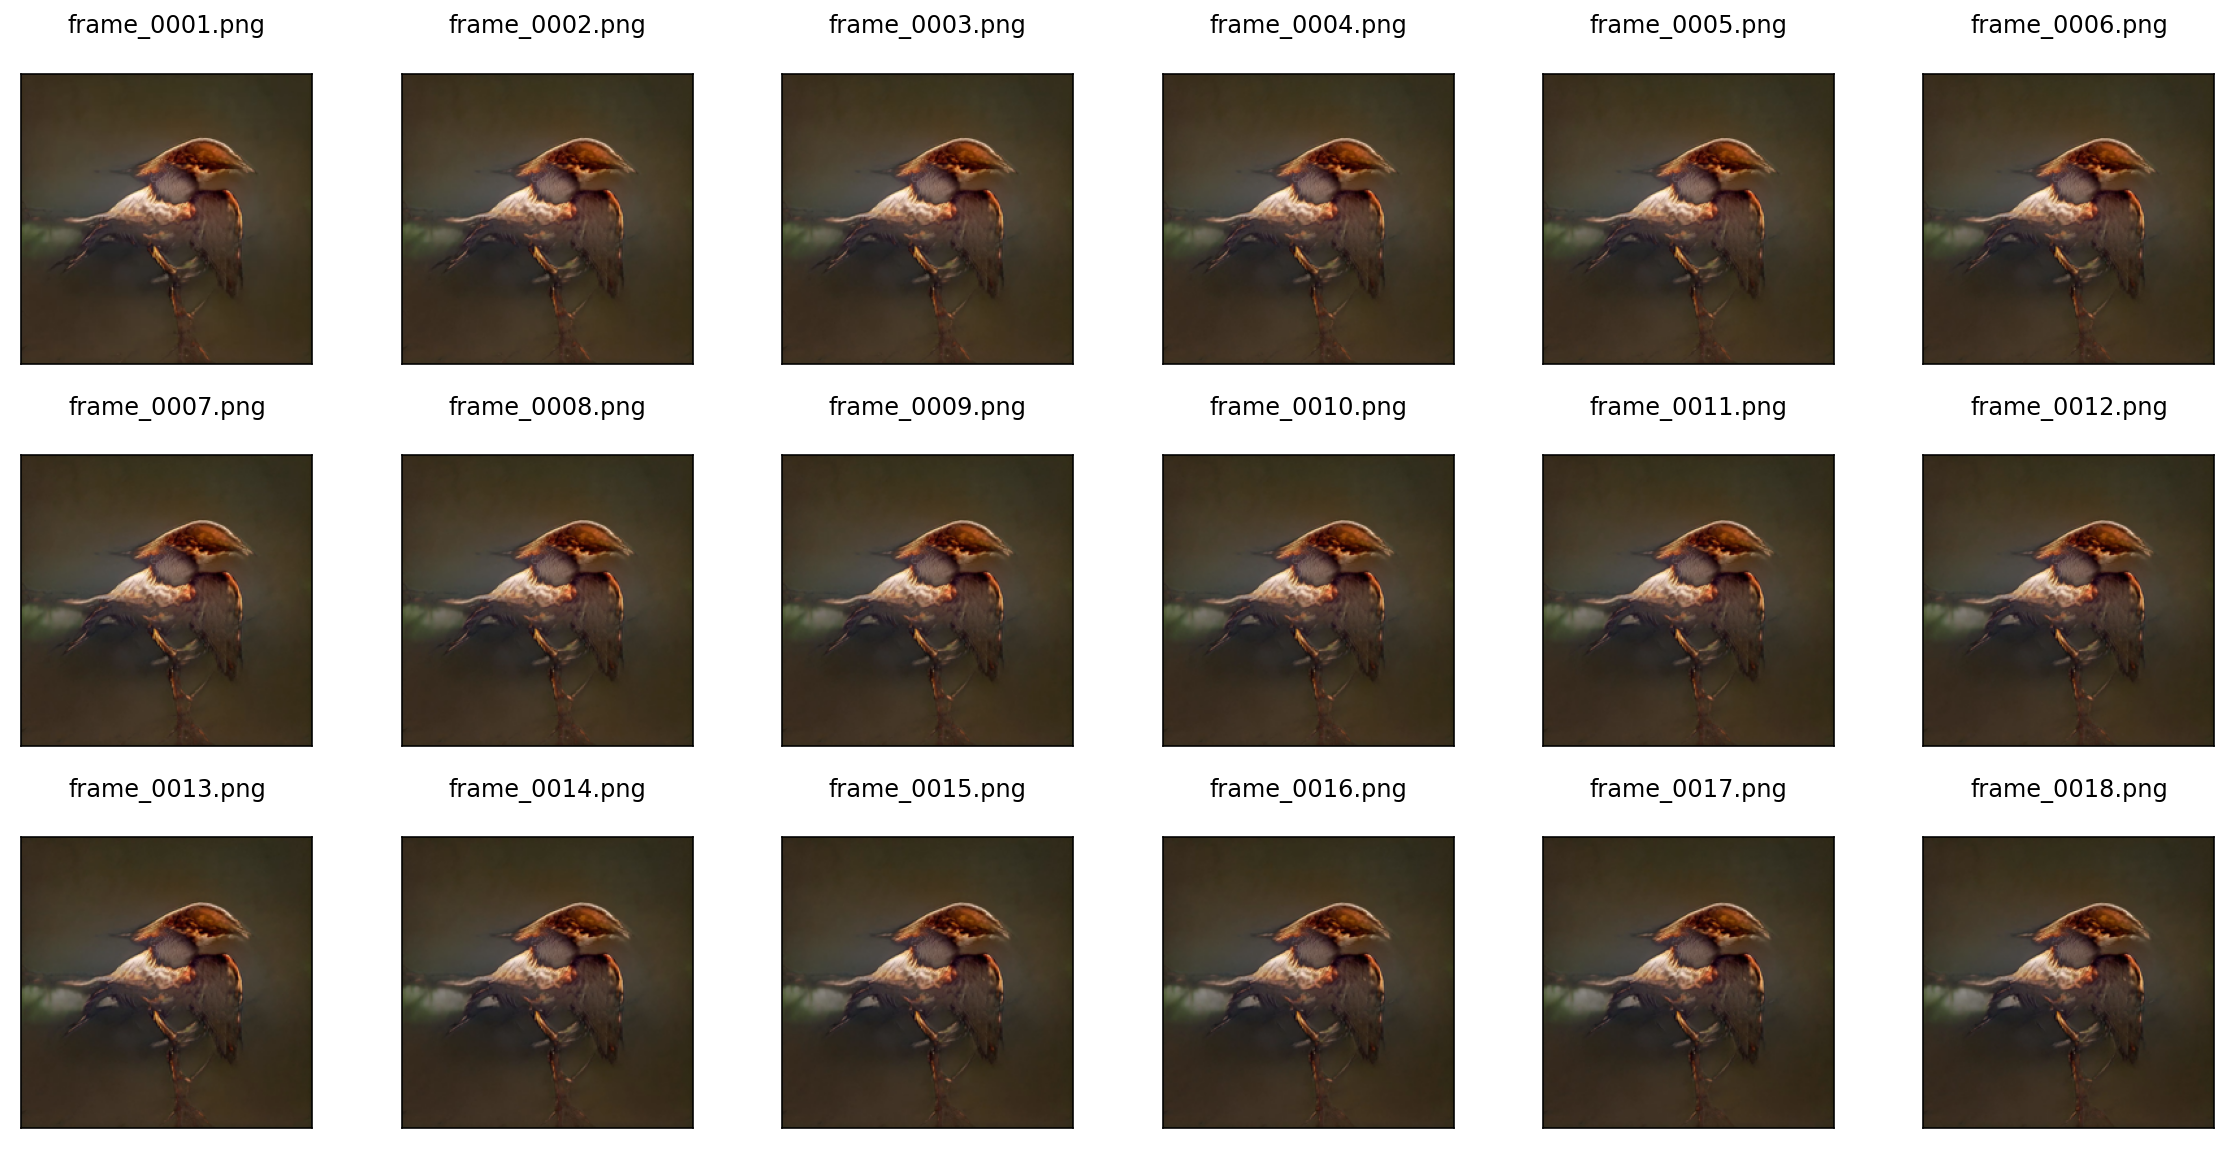

In [23]:

from tqdm.notebook import tqdm_notebook
images = []
#texts = [
plt.figure(figsize=(16, 16))
images_path =  experiment_path+"/frames"

filenames = os.listdir(images_path)
filenames.sort()
cols = 6
filenames = [filename for filename in filenames if filename.endswith(".png") or filename.endswith(".jpg")]
print("Preprocessing images...", len(filenames))
for filename in tqdm_notebook(filenames):
    i = len(images)
    #prop = i / len(images)
    name = os.path.splitext(filename)[0]

    try :
      image = preprocess(Image.open(os.path.join(images_path, filename)).convert("RGB"))
      images.append(image)
    
      #if i < cols*cols:
        
      #print(name)
      if i<cols*cols // 2:
        plt.subplot(6, 6, i+1)
        plt.imshow(image.permute(1, 2, 0))
        plt.title(f"{filename}\n")
        plt.xticks([])
        plt.yticks([])

        plt.tight_layout()
      
    except :
      print("Error reading image", name, "Deleting")
      !rm -v $filename

## Building features

We normalize the images, tokenize each text input, and run the forward pass of the model to get the image and text features.



*   List item
*   List item



In [68]:
top_classes=4

# The words only take effect if cifar is False (otherwise the 100 CIFAR categories will be used)
cifar = False
#words = ["Happiness", "Excitement", "Boredom", "Sadness","Anger", "Disgust", "Fear"] 
#words = ["baby","bed","bicycle","bottle","bowl","boy","bridge","bus","can","castle","chair","clock","cloud","couch","cup","girl","house","keyboard","lamp","man","motorcycle","mountain","pickup_truck","plate","road","rocket","skyscraper","streetcar","table","tank","telephone","television","tractor","train","wardrobe","woman"]
#words = ["compassion","friendship","dreams","bittersweet","calm","relaxing","heroic","energizing","romantic","love","transcendental","mystical","awe-inspiring","eerie","mysterious","joyful","erotic","euphoric","ecstatic","defiant","proud","strong","sad","depressing","tender", "magical", "energetic"]
#words = ["shows compassion","shows friendship","is dreamy","is calm","is relaxing","shows courage", "is energetic","shows romance","shows love","is transcendental","is mystical","is awe-inspring","is eerie","is joyful","depicts confusion","is euphoric","is ecstatic","shows defiance","shows pride","shows strength","is sad","shows sadness","shows depression","is depressing", "is magical", "shows movement","shows tenderness"]
#words = ["woodcock","duck","bear","river crab","beaver"] #,"badger","eagle","wild boar","butterfly","ant","spider"]
#words = ["insect","bird","mushroom","mammal","plant"] #,"badger","eagle","wild boar","butterfly","ant","spider"]
words = ["sadness","happyness","wild nature","a park"]

In [69]:
if cifar:
  from torchvision.datasets import CIFAR100
  words = CIFAR100(os.path.expanduser("~/.cache"), transform=preprocess, download=True).classes

text_descriptions = [f"This photo depicts {label.lower()}" for label in words]

print("\n".join(text_descriptions))

This photo depicts sadness
This photo depicts happyness
This photo depicts wild nature
This photo depicts a park


In [70]:
image_input = torch.tensor(np.stack(images)).cuda()
image_input -= image_mean[:, None, None]
image_input /= image_std[:, None, None]

In [71]:
tokenizer = SimpleTokenizer()
text_tokens = [tokenizer.encode(desc) for desc in text_descriptions]

In [72]:
text_input = torch.zeros(len(text_tokens), model.context_length, dtype=torch.long)
sot_token = tokenizer.encoder['<|startoftext|>']
eot_token = tokenizer.encoder['<|endoftext|>']

for i, tokens in enumerate(text_tokens):
    tokens = [sot_token] + tokens + [eot_token]
    text_input[i, :len(tokens)] = torch.tensor(tokens)

text_input = text_input.cuda()

In [73]:
with torch.no_grad():
    image_features = model.encode_image(image_input).float()
    #text_features = model.encode_text(text_input).float()

## Calculating cosine similarity

We normalize the features and calculate the dot product of each pair.

# Zero-Shot Image Classification

You can classify images using the cosine similarity (times 100) as the logits to the softmax operation.

In [74]:
def get_probs(text_input):
  with torch.no_grad():
      text_features = model.encode_text(text_input).float()
      text_features /= text_features.norm(dim=-1, keepdim=True)

  text_probs = (100.0 * image_features @ text_features.T).softmax(dim=-1)
  return text_probs
  
text_probs = get_probs(text_input)

In [75]:
from scipy import ndimage

def moving_average(x, w):
    return ndimage.gaussian_filter(x, sigma=(w,1))
    #return ndimage.convolve(x, np.ones((w,1))) / w

def smooth_text_probs(text_probs):
  text_probs_cpu = text_probs
  #print(moving_average(text_probs_cpu,5).shape)

  text_probs_smoothed = moving_average(text_probs,100)
  # a Gaussian filter with a standard deviation of 10
  #gauss = ndimage.gaussian_filter1d(img, 10, 1)
  #text_probs_smoothed[0].shape

  return text_probs_smoothed

# mean over whole sequence
#_, top_labels = torch.from_numpy(text_probs.cpu().numpy().mean(0)).cpu().topk(top_classes, dim=-1,sorted=False)
# top_probs = text_probs[:,top_labels].cpu().numpy()

# per frame
text_probs = smooth_text_probs(text_probs.cpu())
top_probs, top_labels = torch.from_numpy(text_probs).cpu().topk(top_classes, dim=-1,sorted=False)


In [76]:
#top_probs = (top_probs / 2) + ((top_probs.cpu().numpy() / np.amax(top_probs.cpu().numpy(), axis=0))/2)
#top_probs =  ((top_probs.cpu().numpy() / np.amax(top_probs.cpu().numpy(), axis=0)))
resort_indices = np.argsort(top_labels.cpu().numpy())
top_labels = np. take_along_axis(top_labels, resort_indices,axis=1)
top_probs = np.take_along_axis(top_probs, resort_indices,axis=1)

#from sklearn.preprocessing import quantile_transform

#top_probs=quantile_transform(top_probs, axis=0, n_quantiles=10)/2+top_probs.cpu().numpy()/2


In [77]:

top_probs.shape, top_labels.shape

(torch.Size([4400, 4]), torch.Size([4400, 4]))

In [78]:

#top_probs, top_labels = text_probs_top.cpu().topk(top_classes, dim=-1,sorted=False)
#top_probs = smooth_text_probs(top_probs)


In [79]:
import json
print(results_path)
resort_indices = np.argsort(top_labels.cpu().numpy())
top_labels_sorted = np. take_along_axis(top_labels, resort_indices,axis=1)
top_probs_sorted = np.take_along_axis(top_probs, resort_indices,axis=1)

with open(f"{results_path}/probabilities.json","w") as f:
  json.dump({
      "words": words,
      "probabilities": top_probs_sorted.tolist()
  }, f)

/content/ipfs/video_to_clip/posthuman_final/results


<Figure size 432x288 with 0 Axes>

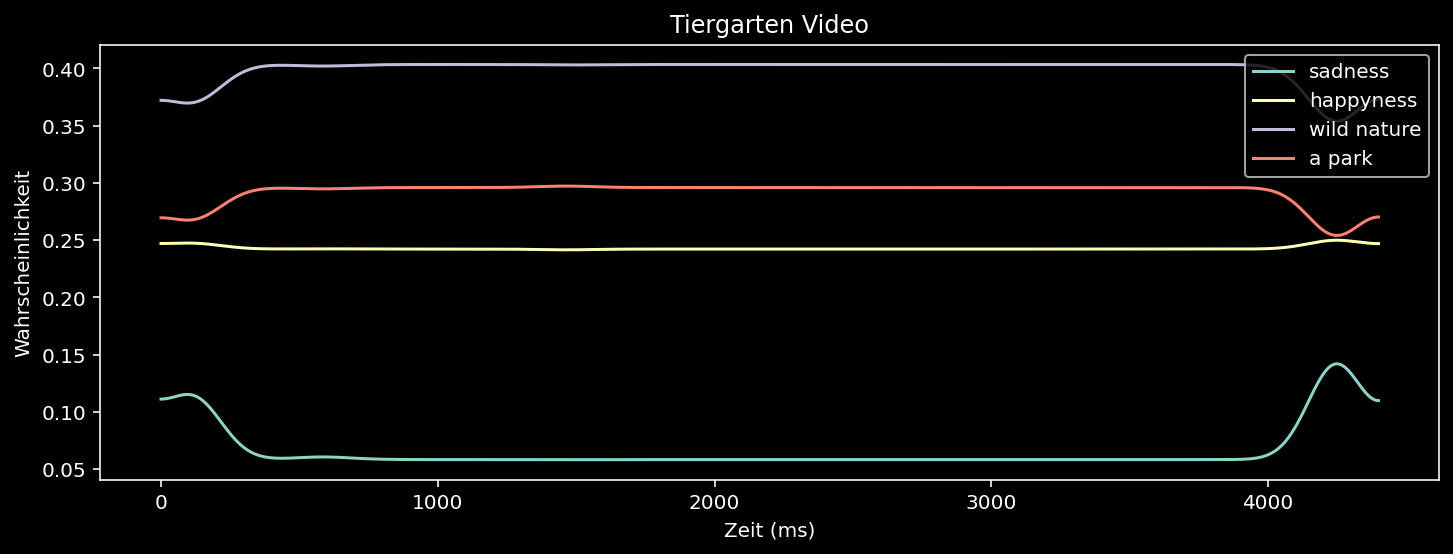

In [80]:
germanwords=["Waldschnepfe","Mandarinenente","Waschbär","Flusskrebs","Biber"]

plt.clf()
plt.figure(figsize=(12,4))
plt.title("Tiergarten Video")
plt.xlabel("Zeit (ms)")
plt.ylabel("Wahrscheinlichkeit")
plt.plot(top_probs_sorted[:,:10])

plt.legend(words)
#plt.plot(text_probs_smoothed[:,:4])
plt.show()
#print(results_path)
#print(top_labels[:100,:5])


4400


frame: 0
frame: 1
frame: 2
frame: 3
frame: 4
frame: 5
frame: 6
frame: 7
frame: 8
frame: 9
frame: 10
frame: 11
frame: 12
frame: 13
frame: 14
frame: 15
frame: 16
frame: 17
frame: 18
frame: 19
frame: 20
frame: 21
frame: 22
frame: 23
frame: 24
frame: 25
frame: 26
frame: 27
frame: 28
frame: 29
frame: 30
frame: 31
frame: 32
frame: 33
frame: 34
frame: 35
frame: 36
frame: 37
frame: 38
frame: 39
frame: 40
frame: 41
frame: 42
frame: 43
frame: 44
frame: 45
frame: 46
frame: 47
frame: 48
frame: 49
frame: 50
frame: 51
frame: 52
frame: 53
frame: 54
frame: 55
frame: 56
frame: 57
frame: 58
frame: 59


KeyboardInterrupt: ignored

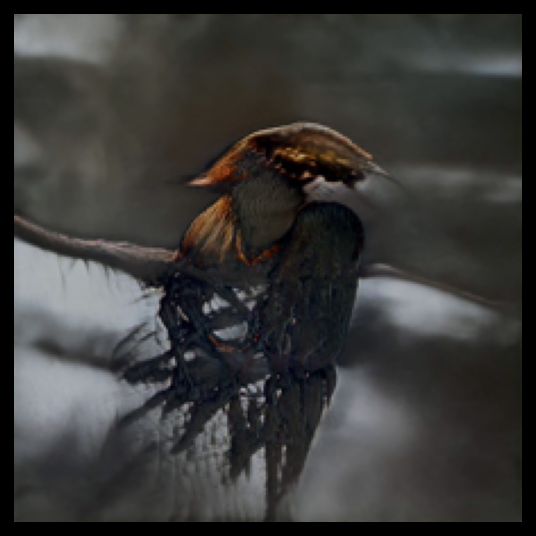

In [81]:

from IPython.display import clear_output
from tqdm.notebook import tqdm

print(len(images))
image_no = 0

plt.style.use('dark_background')
#!rm -rv $results_path
!mkdir -p $results_path
#!mkdir -p /content/ipfs/tiergarten/frames_8fps/valence_arousal/
def plot_img(index):
  #clear_output()
  #plt.ioff()
  image = images[index]
  top_label = top_labels[index]
  top_prop = top_probs[index]
  plt.figure(figsize=(10, 5))
  plt.subplot(1, 2, 1)
  img = image.permute(1, 2, 0)
  plt.imshow(img)
 
  plt.axis("off")
  plt.subplot(1, 2, 2)
  y = np.arange(top_probs.shape[-1])
  plt.grid()
  plt.xlim([0,1])
  plt.barh(y, top_probs[index])  
  plt.gca().invert_yaxis()
  plt.gca().set_axisbelow(True)
  plt.yticks(y, [words[index] for index in top_label.numpy()])
  plt.xlabel("probability")
 
  #plt.subplots_adjust(wspace=0.5)

  plt.tight_layout()
  plt.savefig(f"{results_path}/{experiment_name}_{'{:04}'.format(index)}.png")
  plt.close()
  #plt.show()
 

for i, image in enumerate(tqdm_notebook(images)):
    print("frame:",i)
    plot_img(i)
 
 
# plt.subplots_adjust(wspace=0.5)
# plt.show()

In [ ]:
video_path = results_path+"/"+experiment_name+".mp4"
print("video path",video_path)
!ffmpeg -i $results_path/%*.png  -vf format=yuv420p -r 10 -y $video_path
!mv $results_path/*.png /tmp
from google.colab import files
files.download(video_path) 
files.download(f"{results_path}/probabilities.json")


In [ ]:
blasdas

In [ ]:

import matplotlib
import matplotlib.pyplot as plt

import matplotlib.animation as animation


fps = 30
nSeconds = 5
snapshots = [ np.random.rand(5,5) for _ in range( nSeconds * fps ) ]

# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure( figsize=(8,8) )

a = snapshots[0]
im = plt.imshow(a, interpolation='none', aspect='auto', vmin=0, vmax=1)

def animate_func(i):
    if i % fps == 0:
        print( '.', end ='' )

    im.set_array(snapshots[i])
    return [im]

anim = animation.FuncAnimation(
                               fig, 
                               animate_func, 
                               frames = nSeconds * fps,
                               interval = 1000 / fps, # in ms
                               )

anim.save('test_anim.mp4', fps=fps, extra_args=['-vcodec', 'libx264'])

print('Done!')
